#HDS 5210 - 2024 - Final Project

## Project Description
This broad mental health dataset aggregate project — Depressive and Anxiety Disorders Comprehensive Analysis anchored from United States healthcare databases, explores trends and associations in depression and anxiety disorders among different population groups. Individual PHQ and GAD scores are merged with aggregated state-level prevalence data from the CDC to present an overview of mental health status within the eight dimensions at the segment level. As such, through use of various data transformations, statistical analysis and visualization techniques the study seeks to reveal insightful relationships that will help in the formulation of mental health care policies and intervention plans.    

It includes such complex geometric data processing as age and sex-specific BMI percentiles, z-scores of depression scores and computational joins of the data from several tables. The analytical part uses both classification and regression techniques for the depression diagnosis and for predicting the level of depression It is also used to investigate the correlations between mental health variables and demographics, including gender, age, BMI and the region. Descriptive methods during the analysis include the use of graphs, such as histogram and box plot, as well as comparison of the means across states. It runs on Python, and Pandas library is used for the data manipulation, Scikit-learn is used for machine learning, and several libraries of visualization are used to create appropriate graphical representations of results.

The data obtained in this work has important implications for the development of health policies and healthcare services. The intervention generates patterns about the incidences of depression across states, gender differences in mental health, and the interactions between physical health and mental health, such as the BMI- depression association. These findings can be useful in creating patient-specific services for clinical practitioners, in organizing mental health services for policy makers and in understanding how demographic characteristics may affect mental health for academic researchers. Therefore, the methodological approach and results of this study bring a valuable addition to the overall extant knowledge of mental health trends in the United States and a basis for continued research on this critical area of public health.

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data_cdc = pd.read_excel("/content/cdc_129404_DS1.xlsx")
data_cdc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 7 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   CountyName                                          3143 non-null   object 
 1   State Name                                          3143 non-null   object 
 2   CountyFIPS code                                     3143 non-null   int64  
 3   Crude Prevalence Estimate                           3143 non-null   float64
 4   95% Confidence Interval for Crude Estimates         3143 non-null   object 
 5   Age-adjusted Prevalence Estimate                    3143 non-null   float64
 6   95% Confidence Interval for Age-adjusted Estimates  3143 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 172.0+ KB


In [66]:
data_cdc.head()

,CountyName,State Name,CountyFIPS code,Crude Prevalence Estimate,95% Confidence Interval for Crude Estimates,Age-adjusted Prevalence Estimate,95% Confidence Interval for Age-adjusted Estimates
0,Autauga,Alabama,1001,24.522966,23.3-25.8,24.9,23.6-26.4
1,Baldwin,Alabama,1003,24.614803,23.3-26,25.7,24.3-27.1
2,Barbour,Alabama,1005,23.680523,22.7-24.8,24.2,23.1-25.3
3,Bibb,Alabama,1007,24.809055,23.6-26.1,25.1,23.9-26.4
4,Blount,Alabama,1009,26.652360,25.3-28.1,27.5,26-29


In [67]:
data_depression = pd.read_csv("/content/depression_anxiety_data.csv")
data_depression.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783 entries, 0 to 782
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    783 non-null    int64  
 1   school_year           783 non-null    int64  
 2   age                   783 non-null    int64  
 3   gender                783 non-null    object 
 4   bmi                   783 non-null    float64
 5   who_bmi               783 non-null    object 
 6   phq_score             783 non-null    int64  
 7   depression_severity   779 non-null    object 
 8   depressiveness        780 non-null    object 
 9   suicidal              782 non-null    object 
 10  depression_diagnosis  782 non-null    object 
 11  depression_treatment  779 non-null    object 
 12  gad_score             783 non-null    int64  
 13  anxiety_severity      783 non-null    object 
 14  anxiousness           777 non-null    object 
 15  anxiety_diagnosis     7

In [68]:
data_depression.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,depression_diagnosis,depression_treatment,gad_score,anxiety_severity,anxiousness,anxiety_diagnosis,anxiety_treatment,epworth_score,sleepiness
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,False,False,11,Moderate,True,False,False,7.0,False
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,False,False,5,Mild,False,False,False,14.0,True
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,False,False,6,Mild,False,False,False,6.0,False
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,False,False,15,Severe,True,False,False,11.0,True
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,False,False,14,Moderate,True,False,False,3.0,False


#Data Transformations


##Transform 1:
The conversion of these columns into categorical data types has several important functions in the analysis. Converting these variables to categorical format helps because the data will no longer be in numeric, continuous format but will instead be non-numeric discrete data representing categories. This is important because such factors as gender, severity of depression, and anxiety are categorical variables, and have no proportional ratios between their values. These specific columns were chosen as they are all naturally non-ordinal categorical variables in the context of mental health assessment, unlike the columns which were derived from continuous measurements.

In [69]:
# Data Preprocessing - Cleaning and Transforming Depression Data
# Transform 1: Convert relevant columns to categorical
categorical_cols = ['gender', 'who_bmi', 'depression_severity', 'depressiveness',
                   'anxiety_severity', 'anxiousness', 'sleepiness']
for col in categorical_cols:
    data_depression[col] = pd.Categorical(data_depression[col])

##Transform 2:
Age grouping with the aid of pandas’ pd.cut() makes a significant step in a better understanding of mental health trends or cycles by age grouping. Instead of using the age as a metric in which different numbers might hide significant patterns, it is better to divide the results into certain intervals (<=20, 21-25, 26-30, 31-35, >35) which will help to identify the specific behavior of the examined mental health indicators depending on various ranges of age. Also, this transformation make data pre-processing easier by reducing its dimensionality and steering from focusing on individual differences which hinders the identification of general group trends on mental health throughout the lifecycle.

In [70]:
# Transform 2: Create age groups for better analysis
data_depression['age_group'] = pd.cut(data_depression['age'],
                                    bins=[0, 20, 25, 30, 35, 100],
                                    labels=['<=20', '21-25', '26-30', '31-35', '>35'])

##Transform 3:

The operations that have been applied to the data of confidence intervals provide very important role in making the statistical information more presentable and analyzable. The original data stored the 95% confidence intervals as a single string in the format of (lower, upper), even if this format is comprehensible for a human, it is not very convenient for the mathematical calculations or even statistical analysis. By using regular expressions (str.extract) with the pattern r'((\d+.\d+), (\d+.\d+))', we split this string into two separate numerical columns: CI_Lower and CI_Upper. It basically translates a label, a phrase in fact, into a numerical value statistic which is ready for statistical analysis and decision making.

In [71]:
# Transform 3: Transforming indicators_data - Extract confidence intervals
data_cdc[['CI_Lower', 'CI_Upper']] = data_cdc['95% Confidence Interval for Crude Estimates'].str.extract(r'\((\d+\.\d+), (\d+\.\d+)\)')
data_cdc[['CI_Lower', 'CI_Upper']] = data_cdc[['CI_Lower', 'CI_Upper']].astype(float)

#Transform 4
BMI percentiles obtained by the help of groupby() and rank() with pct=True have a rather important purpose of placing the BMI values in the context of age. Avoiding difficulties linked to direct comparison of stratified BMI values over the weight-of-height ratio customary for different age is achieved applying this transformation: Instead of comparing each individual’s raw BMI value to that of every other person in the same cross-sectional sample by age group, it calculates where each person stands in terms of BMI relative to other members of their birth cohort. The rank(pct=True) function converts these rankings to percentiles from 0 to 1, which mean that it is possible to know whether a person has high or low BMI compared to ages, and all this without regard to actual BMI numbers.

In [72]:
# Tranform 4: Calculate BMI percentile
data_depression['bmi_percentile'] = data_depression.groupby('age')['bmi'].rank(pct=True)

#Transform 5:
The use of z-scores for scores on PHQ (Patient Health Questionnaire) depression reflects a major standardization transformation that translates the raw depression increase into a standardized metric that measures the number of standard deviations an individual score differs from the population average. To standardize the results, we subtract each respondent’s mean PHQ score from each of those figures and divide by the standard deviation, so that a z-score of ‘0’ denotes average levels of depression, levels greater than ‘0’ are indicative of more severe depression, and scores below ‘0’ suggest less severe levels of the same.

In [73]:
# Transform 5: Calculate z-scores for numerical measurements
data_depression['phq_zscore'] = (data_depression['phq_score'] - data_depression['phq_score'].mean()) / data_depression['phq_score'].std()
data_depression.columns

Index(['id', 'school_year', 'age', 'gender', 'bmi', 'who_bmi', 'phq_score',
       'depression_severity', 'depressiveness', 'suicidal',
       'depression_diagnosis', 'depression_treatment', 'gad_score',
       'anxiety_severity', 'anxiousness', 'anxiety_diagnosis',
       'anxiety_treatment', 'epworth_score', 'sleepiness', 'age_group',
       'bmi_percentile', 'phq_zscore'],
      dtype='object')

# Joining and Aggregatins for Joining

The first join links independent mental health records with yearly aggregate data of each patient. In other words, it computes the mean, median and the standard deviation of the screening PHQ and GAD scores alongside the overall tally of the depression diagnoses for the year ending of each school year data . When it is joined back with the original data, each individual receives into their record the aggregated mental health statistics for the school year. This makes it easier for the researcher to explain deviations from the general trend of a given student’s cohort.

The second join extends the contextual information by including statistics by age. First of all the simple arithmetic mean of PHQ and GAD scores is computed, as well as the total number of depressions and anxious patients in every age range. After the second join with the age group mental health pattern data, there is now year level statistics and age group mental health pattern data for each of the individuals. To facilitate a clear differentiation the suffix parameter is defined to be ‘’ or ‘_by_age_group’.

Combined these joins produce a full set of joinery that allows comparison of each person’s point values against a temporal comparison (school year) and cross aged demographic comparison. This enriched dataset allows for a more complex calculation – researchers can compare an individual’s mental health state to scores on the year level or age group, and realize variability that might escape attention if comparing individual scores only. For example, I might discover whether the person’s depression score is high compared to that individual’s school year mean, and compared to the mean for his/her age group in order to present a more well-rounded overall evaluation of the person’s mental state.

In [74]:
# First join: Create year-level mental health statistics
yearly_mental_health = data_depression.groupby('school_year').agg({
    'phq_score': ['mean', 'median', 'std'],
    'gad_score': ['mean', 'median', 'std'],
    'depression_diagnosis': 'count'
}).reset_index()

# Fix the column names
yearly_mental_health.columns = ['school_year', 'avg_phq', 'median_phq', 'std_phq',
                              'avg_gad', 'median_gad', 'std_gad', 'case_count']

#Create age group statistics
age_mental_health = data_depression.groupby('age_group').agg({
    'phq_score': 'mean',
    'gad_score': 'mean',
    'depression_diagnosis': 'sum',
    'anxiety_diagnosis': 'sum'
}).reset_index()

<ipython-input-74-1403596c28fe>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_mental_health = data_depression.groupby('age_group').agg({


In [75]:
# First Join: Combine yearly stats with original data
combined_data = pd.merge(
    data_depression,
    yearly_mental_health,
    on='school_year',
    how='left'
)

combined_data.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,age_group,bmi_percentile,phq_zscore,avg_phq,median_phq,std_phq,avg_gad,median_gad,std_gad,case_count
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,<=20,0.980198,0.423830,7.556364,7.0,4.773664,7.229091,6.0,4.970191,275
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,<=20,0.173913,0.197922,7.556364,7.0,4.773664,7.229091,6.0,4.970191,275
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,<=20,0.772277,0.197922,7.556364,7.0,4.773664,7.229091,6.0,4.970191,275
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,<=20,0.608696,2.682911,7.556364,7.0,4.773664,7.229091,6.0,4.970191,275
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,<=20,0.782609,-0.253894,7.556364,7.0,4.773664,7.229091,6.0,4.970191,275


In [76]:
# Second Join: Add age group statistics
final_data = pd.merge(
    combined_data,
    age_mental_health,
    on='age_group',
    how='left',
    suffixes=('', '_by_age_group')
)

final_data.head()

,id,school_year,age,gender,bmi,who_bmi,phq_score,depression_severity,depressiveness,suicidal,...,median_phq,std_phq,avg_gad,median_gad,std_gad,case_count,phq_score_by_age_group,gad_score_by_age_group,depression_diagnosis_by_age_group,anxiety_diagnosis_by_age_group
0,1,1,19,male,33.333333,Class I Obesity,9,Mild,False,False,...,7.0,4.773664,7.229091,6.0,4.970191,275,7.440605,7.174946,32,30
1,2,1,18,male,19.841270,Normal,8,Mild,False,False,...,7.0,4.773664,7.229091,6.0,4.970191,275,7.440605,7.174946,32,30
2,3,1,19,male,25.102391,Overweight,8,Mild,False,False,...,7.0,4.773664,7.229091,6.0,4.970191,275,7.440605,7.174946,32,30
3,4,1,18,female,23.738662,Normal,19,Moderately severe,True,True,...,7.0,4.773664,7.229091,6.0,4.970191,275,7.440605,7.174946,32,30
4,5,1,18,male,25.617284,Overweight,6,Mild,False,False,...,7.0,4.773664,7.229091,6.0,4.970191,275,7.440605,7.174946,32,30


#Aggregation

##First Aggregation
This pivot table transformation condenses and reshapes the depression data to demonstrate how the PHQ values differ with the help of several visualizations such as bar charts and line charts. Through the pivot_table function, values, phq_score, corresponds to the mean PHQ scores calculated for each age group, index, and gender, columns, where the rows reveal the age groups or age ranges, columns represent the gender categories or gender, and the values in the cells giving the average depression scores for each age gender cohort.

In [77]:
# First aggregation: Depression severity by age group and gender
depression_by_age_gender = pd.pivot_table(data_depression,
                                        values='phq_score',
                                        index='age_group',
                                        columns='gender',
                                        aggfunc='mean').round(2)
depression_by_age_gender.head()

<ipython-input-77-66d5a8ffebd4>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  depression_by_age_gender = pd.pivot_table(data_depression,


gender,female,male
age_group,,
<=20,7.99,6.84
21-25,7.45,5.83
26-30,8.00,6.00
31-35,7.00,11.00


##Second Aggregation
This transformation in the pivot table evaluates the connection between BMI classes as per WHO and anxiety severity rank created using anxiety severity scores’ cross-tabulation. The code below continued the frequency of GAD scores, values or gland_score and WHO BMI, index or who_bmi and the severity of anxiety, columns or anxiety_severity. The aggfunc parameter on the ‘count’ implies that instead of means or other statistics, Occurrences are to be counted and fill_value ‘0’ to replace all missing values by zeros other than NaN. This transformation affords an understanding of whether specific BMI categories are linked to specific patterns of anxiety severity, something which could be useful in gaining an operational understanding of the connection of physical health indices and psychiatric disorders.

In [78]:
# Second aggregation: Anxiety levels across BMI categories
anxiety_by_bmi = pd.pivot_table(data_depression,
                               values='gad_score',
                               index='who_bmi',
                               columns='anxiety_severity',
                               aggfunc='count',
                               fill_value=0)
anxiety_by_bmi.head()

<ipython-input-78-bd60187bfc85>:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  anxiety_by_bmi = pd.pivot_table(data_depression,


anxiety_severity,0,Mild,Moderate,None-minimal,Severe
who_bmi,,,,,
Class I Obesity,0,9,8,8,3
Class II Obesity,0,2,1,0,2
Class III Obesity,0,2,1,1,0
Normal,4,203,80,186,37
Not Availble,0,2,0,6,0


#Visualizations
###Depression Score Distribution
This histogram shows how the PHQ (Patient Health Questionnaire) score is distributed within the participants of the study retrospectively with a right shift in means and median scores ranging between 7-8. The PHQ value, here varies between 0 and 25, is an index of severity of depression symptoms where higher value refer to a higher level of severity. Most of the participants fell in the mild to moderate depression symptoms range of 5-10 with the numbers gradually reducing as the severity increases toward the higher ratings. The positive skewed finds that most participants had small to moderate levels of depressive symptoms, but also significant portion of viewers in the sample had higher levels of symptoms (scores >15). Such distribution is common among mental health disorders, and higher severity is less frequent, even though they are also an essential patient group.

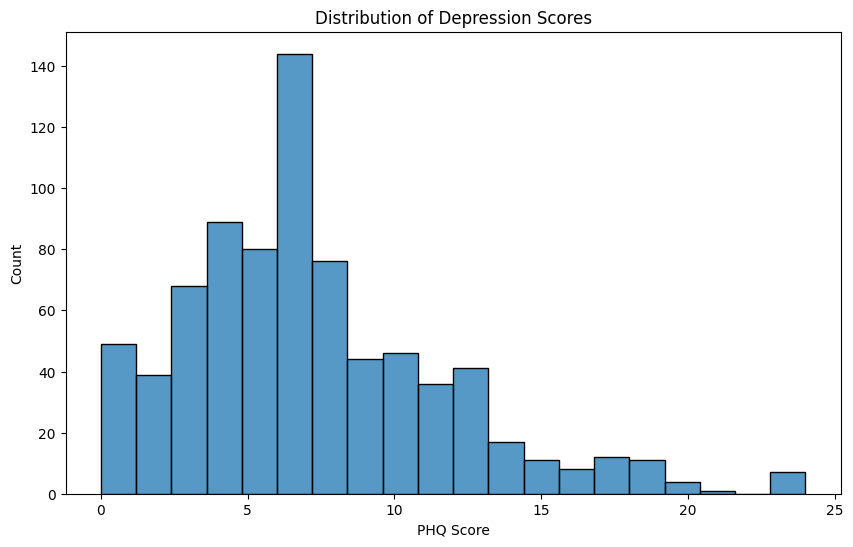

In [79]:
# Visualization 1: Depression Score Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data_depression['phq_score'], bins=20)
plt.title('Distribution of Depression Scores')
plt.xlabel('PHQ Score')
plt.ylabel('Count')
plt.show()

## Depression Severity by Gender
The boxplot below displays the operating mode of the PHQ (Patient Health Questionnaire) depression scores depending on gender; obvious differences between females and males are apparent. The actual mean PHQ score represented by the horizontal line in each box plot reveals that females are higher, about 7, than males with about 6, stated that they experience more severe depressive symptoms in the sample. Males and females can be seen to have similar variations of scores represented by heights of the rectangular boxes (interquartile ranges) and length of whiskers above and below the boxes. The outliers above the whiskers for both genders indicate that the cases of severe depression that depict scores higher than 15 are present in both genders but with extreme scores of about 24. This reveals that although there is a significant difference in the mean scores of depression between male and female, the boxes reveal considerable similarity in the experience of depressive symptoms between the male and female participants of the study.

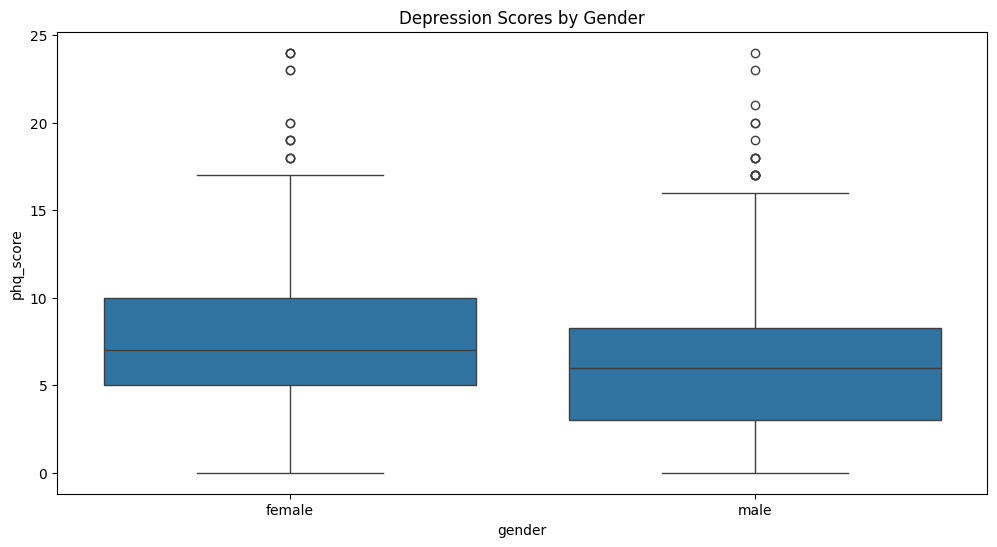

In [80]:
# Visualization 2: Depression Severity by Gender
plt.figure(figsize=(12, 6))
sns.boxplot(x='gender', y='phq_score', data=data_depression)
plt.title('Depression Scores by Gender')
plt.show()

## Crude Prevalence by State
This diagram shows the value of Crude Prevalence Estimation of depressants by the twenty most affected States for the USA highlighting geographical disparity of depressant reporting in the US. The state with the highest prevalence estimate is West Virginia (approx 27%), closely followed by Tennessee and Kentucky – pointing toward increased prevalence of higher depression rates in the Appalachian region. The estimates decline progressively through the states, with Pennysylvania having the minimal rate to the overall rates among the top twenty- around twenty- one percent. Notably, the states with higher prevalence estimates are mainly in the southern and Mid western part many of which experience economic hardships or large sections of their populations live in rural areas. The disparity between the highest and the lowest rates in this top 20 group (approximating six percentage points apart from West Virginia to Pennsylvania) suggest significant disparities in the rates of depressive illness across different populations of states which might reflect in the degree of accessibility of mental health care, the standards of living or the demography of the affected regions.

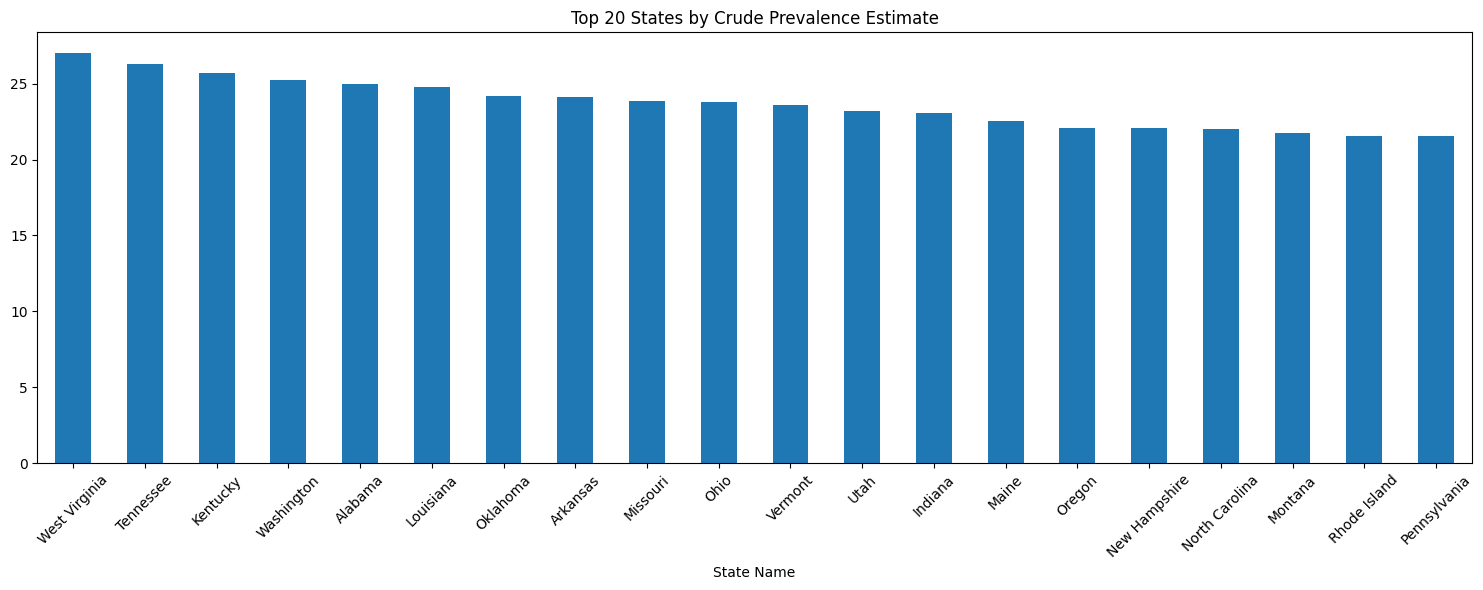

In [81]:
# Visualization 3: Crude Prevalence by State
state_prevalence = data_cdc.groupby('State Name')['Crude Prevalence Estimate'].mean().sort_values(ascending=False)
plt.figure(figsize=(15, 6))
state_prevalence.head(20).plot(kind='bar')
plt.title('Top 20 States by Crude Prevalence Estimate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#Model Building

In [82]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

def preprocess_data(df):
    """
    Preprocess the depression dataset for modeling.

    Args:
        df (pd.DataFrame): Raw depression dataset

    Returns:
        pd.DataFrame: Preprocessed dataset
    """
    # Create copy to avoid modifying original data
    data = df.copy()

    # Encode categorical variables
    le = LabelEncoder()
    categorical_cols = ['gender', 'who_bmi', 'depression_severity',
                       'anxiety_severity', 'depression_diagnosis', 'anxiety_diagnosis']

    for col in categorical_cols:
        if col in data.columns:
            data[col] = le.fit_transform(data[col].astype(str))

    # Create feature for depression/anxiety ratio
    data['depression_anxiety_ratio'] = data['phq_score'] / (data['gad_score'] + 1)

    # Create BMI categories
    data['bmi_category'] = pd.cut(data['bmi'],
                                 bins=[0, 18.5, 25, 30, float('inf')],
                                 labels=[0, 1, 2, 3])

    return data

In [83]:
def prepare_features(data, target_col):
    """
    Prepare features for modeling.

    Args:
        data (pd.DataFrame): Preprocessed dataset
        target_col (str): Name of target column

    Returns:
        tuple: X (features) and y (target) arrays
    """
    # Select features for modeling
    feature_cols = ['age', 'bmi', 'phq_score', 'gad_score',
                   'epworth_score', 'depression_anxiety_ratio',
                   'gender', 'who_bmi', 'bmi_category']

    # Remove target column if it's in feature_cols
    feature_cols = [col for col in feature_cols if col != target_col]

    X = data[feature_cols]
    y = data[target_col]

    # Impute missing values using the mean
    from sklearn.impute import SimpleImputer  # Import SimpleImputer
    imputer = SimpleImputer(strategy='median')  # Create imputer instance
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)  # Impute and re-create DataFrame

    # Scale features
    scaler = StandardScaler()
    X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

    return X, y

#Logistic Regression & Random Forest Classifier
##Logistic Regression (lr_model):
Logistic Regression is used as the first model for objection type: whether or not (1/0) the person has a depression diagnosis. The model predicts the likelihood of depression diagnosis employing a logistic function from the features which are PHQ scores, GAD scores, age, gender and BMI. The set max_iter=1000 parameter enables the model to run through countless iterations to get the convergence. One of Logistic Regression’s main advantages is its interpretability – the coefficients hold actual significance that quantifies each of features’ effect on depression probability. However, it assumes that the features are linearly related to the logarithm of odds of the outcome.

#Random Forest Classifier (rf_model):
There is random selection of multiple trees in the model and the outcome of each tree is used for voting, thus, is more resistant to overfitting and more capable of capturing nonlinear relations in input records. Fundamentally, each tree in the forest makes use of a randomly selected set of features and selection of samples, yielding a variety of classifiers. In this mental health context, Random Forest can identify joint effects between several health status indicators and demographic characteristics not traced in the logistic regression model due to its complexity. For example, it might better identify the ways by which phq score combinations, anxiety levels and potential demographic risk factors may interactively impact on the ultimate depression diagnosis.

In [84]:
def train_classification_models(X, y):
    """
    Train and evaluate classification models.

    Args:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable

    Returns:
        tuple: Trained models and their performance metrics
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    lr_model = LogisticRegression(random_state=42, max_iter=1000)
    rf_model = RandomForestClassifier(random_state=42)

    lr_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Make predictions
    lr_pred = lr_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)

    # Calculate metrics
    lr_accuracy = accuracy_score(y_test, lr_pred)
    rf_accuracy = accuracy_score(y_test, rf_pred)

    return (lr_model, rf_model), (lr_accuracy, rf_accuracy), (X_test, y_test)


#Linear Regression & Random Forest regressor
##Linear Regression (lr_model):
Linear Regression is the first regression model form fits for the features and the target variable (PHQ scores) in a linear manner. This model uses a least squares approach to identify a straight line that fits best through the data by reckoning the squared differences between projections and actual results. In the mental health context, it attempts to predict depression severities scores as similar to features such as anxiety scores, age, BMI and other health diagnostics. Linear Regression’s strength is interpretability as each coefficient estimate shows how PHQ changes with a one-unit change of the feature, controlling for other features.
##Random Forest Regressor (rf_model):
What the Random Forest Regressor does is to build a number of decision trees, for each decision tree predicting a real value and the final output being the mean of all the trees. The current model can calculate interactions between the characteristics and non-linear relations that could impact depression intensity. For instance, it may better capture how depression scores are a function of anxiety levels, sleep pattern or demographics all at once. Parameter like random_state=42 is used so that the results can be reproduced again.

In [85]:
def train_regression_models(X, y):
    """
    Train and evaluate regression models.

    Args:
        X (pd.DataFrame): Feature matrix
        y (pd.Series): Target variable

    Returns:
        tuple: Trained models and their performance metrics
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train models
    lr_model = LinearRegression()
    rf_model = RandomForestRegressor(random_state=42)

    lr_model.fit(X_train, y_train)
    rf_model.fit(X_train, y_train)

    # Make predictions
    lr_pred = lr_model.predict(X_test)
    rf_pred = rf_model.predict(X_test)

    # Calculate metrics
    lr_mse = mean_squared_error(y_test, lr_pred)
    rf_mse = mean_squared_error(y_test, rf_pred)
    lr_r2 = r2_score(y_test, lr_pred)
    rf_r2 = r2_score(y_test, rf_pred)

    return (lr_model, rf_model), (lr_mse, rf_mse, lr_r2, rf_r2), (X_test, y_test)

In [86]:
def plot_feature_importance(model, feature_names, title):
    """
    Plot feature importance for Random Forest models.

    Args:
        model: Trained Random Forest model
        feature_names (list): List of feature names
        title (str): Plot title
    """
    importances = pd.DataFrame({
        'feature': feature_names,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=importances, x='importance', y='feature')
    plt.title(title)
    plt.tight_layout()
    plt.show()

In [87]:
def plot_regression_results(y_test, predictions, title):
    """
    Plot actual vs predicted values for regression models.

    Args:
        y_test: True values
        predictions: Model predictions
        title (str): Plot title
    """
    plt.figure(figsize=(10, 6))
    plt.scatter(y_test, predictions, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(title)
    plt.tight_layout()
    plt.show()



Classification Analysis: Predicting Depression Diagnosis
--------------------------------------------------
Logistic Regression Accuracy: 0.924
Random Forest Accuracy: 0.924


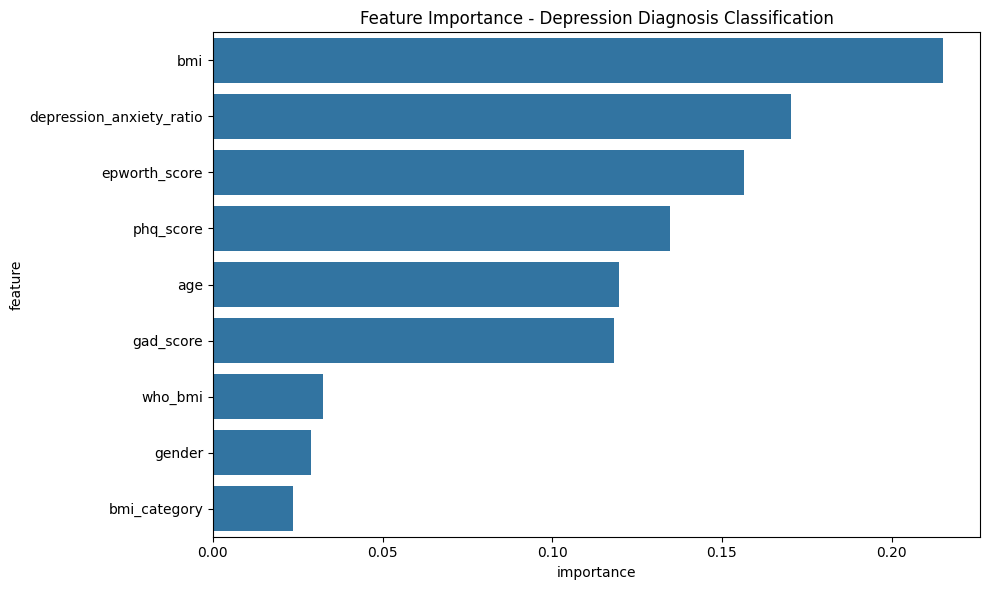


Regression Analysis: Predicting PHQ Score
--------------------------------------------------
Linear Regression MSE: 5.465, R²: 0.718
Random Forest MSE: 0.487, R²: 0.975


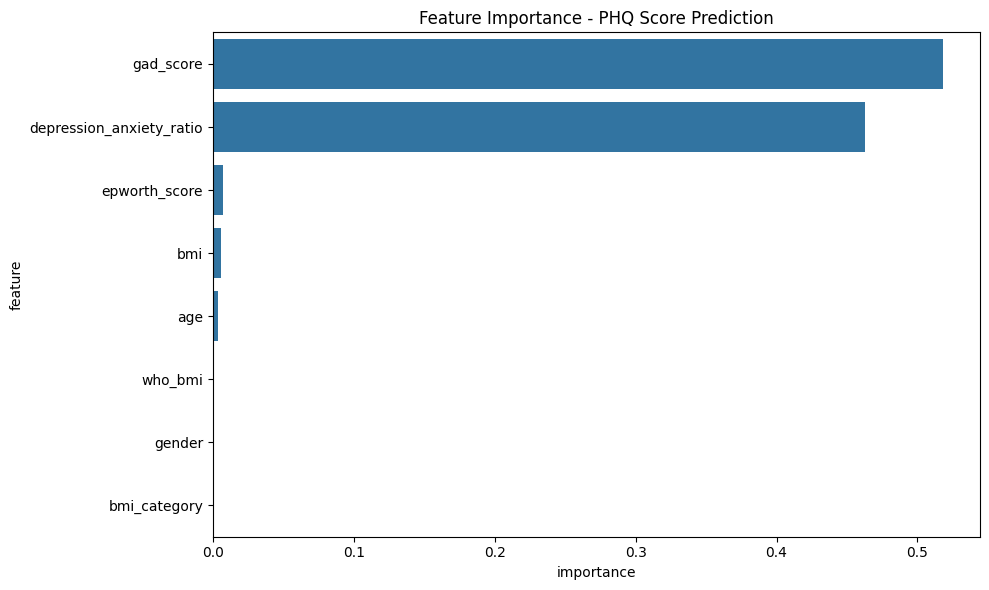

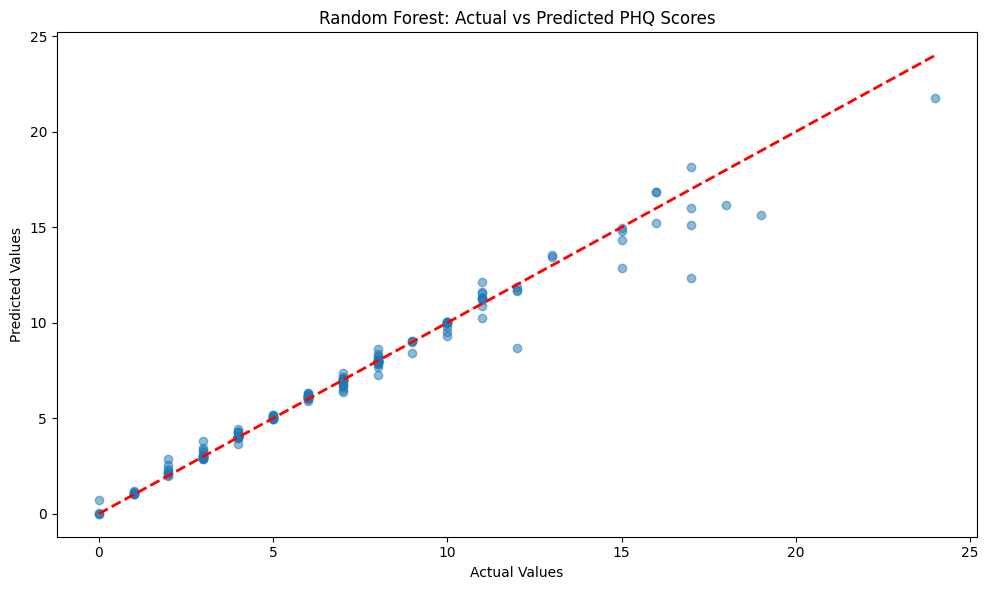

In [88]:
# Main analysis execution
def main():
    """
    Main function to run the analysis pipeline.
    """
    # Load and preprocess data
    data_depression = pd.read_csv('depression_anxiety_data.csv')
    processed_data = preprocess_data(data_depression)

    # Classification task: Predict depression_diagnosis
    print("\nClassification Analysis: Predicting Depression Diagnosis")
    print("-" * 50)
    X_class, y_class = prepare_features(processed_data, 'depression_diagnosis')
    class_models, class_metrics, class_test_data = train_classification_models(X_class, y_class)

    print(f"Logistic Regression Accuracy: {class_metrics[0]:.3f}")
    print(f"Random Forest Accuracy: {class_metrics[1]:.3f}")

    # Plot feature importance for classification
    plot_feature_importance(class_models[1], X_class.columns,
                          'Feature Importance - Depression Diagnosis Classification')

    # Regression task: Predict PHQ score
    print("\nRegression Analysis: Predicting PHQ Score")
    print("-" * 50)
    X_reg, y_reg = prepare_features(processed_data, 'phq_score')
    reg_models, reg_metrics, reg_test_data = train_regression_models(X_reg, y_reg)

    print(f"Linear Regression MSE: {reg_metrics[0]:.3f}, R²: {reg_metrics[2]:.3f}")
    print(f"Random Forest MSE: {reg_metrics[1]:.3f}, R²: {reg_metrics[3]:.3f}")

    # Plot feature importance for regression
    plot_feature_importance(reg_models[1], X_reg.columns,
                          'Feature Importance - PHQ Score Prediction')

    # Plot regression results
    plot_regression_results(reg_test_data[1],
                          reg_models[1].predict(reg_test_data[0]),
                          'Random Forest: Actual vs Predicted PHQ Scores')

if __name__ == "__main__":
    main()

#Conclusion
The current research studies the primary patterns and correlates of mental health, including depression and anxiety in a large sample. The two sources of data used in the study were PHQ and GAD scales, and state-level prevalence studies were utilized to compare the results across the different samples. The results are male female differences in depression scores, females having slightly higher PHQ mean scores than males, and regional differences of depressed populations and surprisingly high rates in some of the Appalachian states such as West Virginia and Tennessee. It also highlighted the usefulness of the age-related data transformations like age banding, BMI percentile computation and z-score standardisations to make sense of the health of students’ brains. The distributions of depression scores were generally positively skewed, which although satisfying the assumption that the vast majority of people are experiencing mild to moderate depressive symptoms, it also revealed that there is a subgroup population within the extreme high range, which warrant attention. Information like this can be used to help plan the approach to mental health on individual, as well as state and national levels, so as to help improve mental health care approaches.